### Problem 1.
Calculate:


 a) The pressure of the plasma permeating the Solar corona. How does it compare to Earth's atmospheric pressure at the sea level? The number density of the Solar corona is $n=10^9\,\rm cm^{-3}$ and its temperature is $T=2\times 10^6\,\rm K$.
 
## Equation of state (EOS) of ideal gas:

If we assume the gas is ideal, the EOS is:

$$p = n\,k_B\,T,$$

where $p$ is the thermal pressure, $n$ is the number density (i.e. the number of particles per unit volume), $k_B=1.38\times 10^{-16}\,\rm cm^2\,g\,s^{-2}\,K^{-1}$ is the Boltzmann constant, and $T$ is the gas temperature in $\rm K$.
 
 

In [1]:
import numpy as np
import math as ma

kb=1.380649e-23	 #[J/K]

#### Corona Solar
ns=(1.0e9)*100**3 #[m^-3]
Ts=2e6 #[K]

#####  Tierra
nt=2.054e+19*100**3 #[m^-3] 
Tt=298.15 #[K]


Ps=ns*kb*Ts/101325
Pt=nt*kb*Tt/101325



print("La presión de la corona solar es","{:0.5e}".format(Ps),"atm, comparada con la presión de la Tierra")
print("al nivel del mar es P_solar/P_earth=",Ps/Pt)


La presión de la corona solar es 2.72519e-07 atm, comparada con la presión de la Tierra
al nivel del mar es P_solar/P_earth= 3.2658387874201853e-07


b) The polytropic index of carbon-monoxide (CO) gas. Hint: Get the degrees of freedom first.


The polytropic index (or heat capacity ratio):

$$\gamma = \frac{c_P}{c_V},$$


In [2]:
print("El monóxido de carbono es una molécula bi-atómica")
print("con 5 grados de libertad: 3 grados de traslación y 2 de rotación ")
print("con lo cual su índice politrópico es: ")
print("gamma=1+2/5=7/5=1.4")
print("\n Además, si realizamos la razón entre la capacidad calorífica a presión y volumen constante del ")
print("monóxido de carbono es")
print("c_p=1.039 kJ/kg-K, c_v=0.7417 kJ/kg-K")
c_p=1.039#kJ/kg-K
c_v=0.7417#kJ/kg-K

gamma=c_p/c_v
print("gamma=",gamma)

El monóxido de carbono es una molécula bi-atómica
con 5 grados de libertad: 3 grados de traslación y 2 de rotación 
con lo cual su índice politrópico es: 
gamma=1+2/5=7/5=1.4

 Además, si realizamos la razón entre la capacidad calorífica a presión y volumen constante del 
monóxido de carbono es
c_p=1.039 kJ/kg-K, c_v=0.7417 kJ/kg-K
gamma= 1.4008359174868543


## c)  
The mean particle mass (mean molecular weight) of air in our atmosphere (remember Nytrogen is the most abundant element). Once calculated, add it to the phase diagram $T$ vs. $\mu$ shown in class. How does the value compare to that of atomic hydrogen?

## Mean particle mass

Another quantity we mentioned above is the mean particle mass, $\mu$ (also known in the literature as the mean molecular weight).

$$\frac{1}{\mu}=\sum_i{\frac{x_i}{A_i}}\left(1+Z_i\right),$$

where $x_i$ is the fraction corresponding to each element, $i$, $A_i$ is the mass number of element $i$, and $Z_i$ is the charge of its nucleus.

## Rpta:
Los componentes del aire seco en una primera aproximación son: 78.08% Nitrógeno, 20.95% Oxígeno, 0.97% Argón


The mean particle mass of air is 14.470172065849617


Text(0.5, 1.0, 'Diagrama de fases de la presión en función de la temperatura y el peso medio de las partículas')

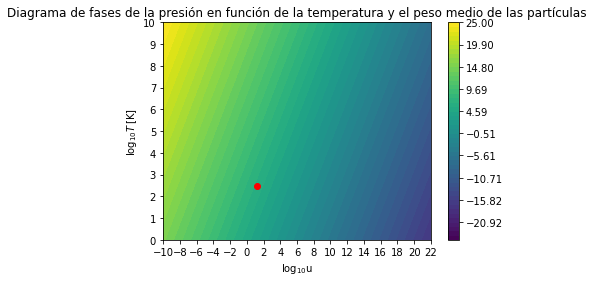

In [3]:
import matplotlib.pyplot as plt

###Nitrógeno
xn=78.08/100 #Concentración del nitrógeno
An=14.0 ##Número de masa

##Oxígeno
xo=20.95/100 ##
Ao=16.0

## Argón
xa=0.97/100
Aa=40.0 


u=(xn/An+xo/Ao+xa/Aa)**(-1)

print("The mean particle mass of air is", u )

def pressure(u,T):
    den=1.28*1000/100**3 #kg/m³ to g/cm³
    m=1.67e-24# g
    kb=1.38e-16 #cm²-g/s²-K 

    return den*kb*T/(m*u)

u_mass = np.arange(-10,22,0.01)
temperature = np.arange(0,10,0.01)

X, Y = np.meshgrid(u_mass, temperature)

pressure_2D = np.array(pressure(np.ravel(10**X), np.ravel(10**Y)))
Z = pressure_2D.reshape(X.shape)

fig,ax=plt.subplots(1,1)
cp = ax.contourf(X, Y, np.log10(Z),levels=np.linspace(-25, 25, 50), cmap='viridis')  ##buen color viridis

ax.scatter(np.log10(u), np.log10(298.15), c='red')




fig.colorbar(cp) 
ax.set_title(r'$\log_{10} p\,\rm [dyne\,cm^{-2}$]')
ax.set_xticks(np.arange(-10,23,2))
ax.set_xlabel(r'$\log_{10}\rm u$ ')
ax.set_yticks(np.arange(0,11,1))
ax.set_ylabel(r'$\log_{10} T\,\rm [K]$')
ax.set_title("Diagrama de fases de la presión en función de la temperatura y el peso medio de las partículas")



d) The Reynolds number of the blood flow in the aorta. Hint: Use the Internet to get the parameters you need.

## The Reynolds number:

Given a gas with density, $\rho$, kinematic viscosity, $\nu$, and dynamic viscosity $\mu=\rho\,\nu$, moving at a speed, $v$, the Reynolds numbers is:

$$R_{\rm e} = \frac{v\,l}{\nu} = \frac{\rho\,v\,l}{\mu}$$

where $l$ is a characteristic length of the flow.
 
 

In [4]:
D=22.92e-1 #cm, Diámetro de la aorta para personas menores a 40 años
den=1.06 #g/cm³ densidad de la sangre
vel=33 #cm/s velocidad de la sangre
u=(3.5e-3)*10 #Pa.s to dyna/cm²

Re=den*vel*D/u

print("El reynolds del flujo de la sangre por la aorta es",Re,",la sangre se encuentra en el régimen turbulenta")

El reynolds del flujo de la sangre por la aorta es 2290.6902857142854 ,la sangre se encuentra en el régimen turbulenta


### Problem 2.
Considering the example of the swimming fish we saw in class, calculate the Reynolds numbers for different swimming speeds and make a plot of $R_{\rm e}$ vs. speed. Indicate the laminar and turbulent regimes on the plot. At which speed does the fish start generating a turbulent flow in sea water?

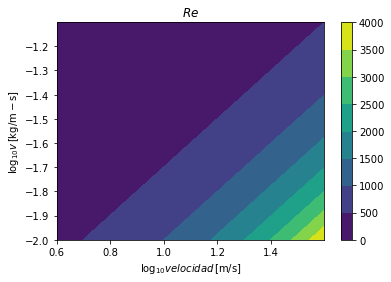

In [5]:


Re=[]


#Se utilizará el pez del ejercicio en clase, con fines prácticos se utilizará una velocidad máxima del pez de 
#0.012 m/s=0.0432 km/h

def Re_number(vel, v):
    #mu=0.00122
    le=1
    #rho=1026
    

    
    return (vel*le)/(v)

# All quantities in SI units.


#vel = np.arange(0,0.012,0.01)

vel = np.arange(0.6,1.6,0.001)
v= np.arange(-2,-1.1,0.001)

X, Y = np.meshgrid(vel, v)




# Compute pressure on the grid
Re = np.array(Re_number(np.ravel(10**X),np.ravel(10**Y))) 

Re =Re.reshape(X.shape)


fig,ax=plt.subplots(1,1)
#cp = ax.contourf(X, Y, np.log10(Re), levels=np.linspace(-2, 10000, 100), cmap='viridis')
#cp = ax.contourf(X, Y, np.log10(Re), cmap='viridis')
cp = ax.contourf(X, Y, Re, cmap='viridis')




fig.colorbar(cp) 
ax.set_title(r'$ Re\,\rm $')
ax.set_xticks(np.arange(0.6,1.6,0.20))
ax.set_xlabel(r'$\log_{10} velocidad\,\rm [m/s]$')
ax.set_yticks(np.arange(-2,-1.1,0.10))
ax.set_ylabel(r'$\log_{10} v\,\rm [kg/m-s]$')



plt.show()




### Problem 3.
Download the full dataset from the 2D turbulence simulation that we analysed in class (TURB_DRIVE) and:

- Calculate the rms flow velocity and the corresponding rms Mach number as a function of time (see equations in the lecture notebook).
- Save the data into a text file as shown in the example in class, and then make a plot of rms Mach number versus time. Remember that the sound speed of the simulation is $c_{\rm iso}=10\,\rm km\,s^{-1}$. 
- Based on the result above, is the gas subsonic or supersonic in this simulation?
 
 
## Turbulence Mach number:

Within a turbulent gas, the velocity field is therefore non-uniform and vary spatially and with time. Therefore, it is common to study it using the root mean square (rms) turbulence Mach number:

$$M_{\rm turb} = \frac{v_{\rm rms}}{c_{\rm sound}},$$

where $v_{\rm rms}=\overline{v^2}$, and $c_{\rm sound}$ is the sound speed of tha gas. 


In [11]:
import vtk
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import ascii
import math



In [116]:
def read_my_vtk(file_name1):
    """Read Pluto's VTK simulation files and returns the variables in CGS units"""
    
    # Path to files
    input_directory="./TURB_DRIVE/"
    file_name = file_name1
    times_file = "vtk.out"
    
    # Normalisation values
    l0 = 3.086e+18                    # Length is 1pc
    v0 = 1.e+6                        # Velocity is 10km/s
    rho0 = 1.66e-24                   # In g/cm^3
    mu = 6.72E-01                     # Mean particle mass
    mm = 1.660E-24                    # 1 Atomic mass unit
    kb = 1.380E-16                    # in CGS units
    tem0 = (mu*(mm*(v0**2))/kb)       # in K
    bfi0 = 4*math.pi*(rho0*(v0**2))   # in Gauss

    # Standard VTK loading routines
    reader= vtk.vtkDataSetReader()
    reader.SetFileName(input_directory+file_name)
    reader.ReadAllVectorsOn()
    reader.ReadAllScalarsOn()
    reader.Update()

    # Get data using hearder information
    data = reader.GetOutput() 
    dens = data.GetCellData().GetArray("rho")
    vel1 = data.GetCellData().GetArray("vx1")
    vel2 = data.GetCellData().GetArray("vx2")
    bfi1 = data.GetCellData().GetArray("Bx1")
    bfi2 = data.GetCellData().GetArray("Bx2")
    
    # Get dimensions, needed to get 3D arrays, instead of 1D vectors
    dim = data.GetDimensions()
    vec = list(dim)
    vec = [i-1 for i in dim]
    
    # Copy data into numpy arrays
    rho = np.array(dens)
    vx1 = np.array(vel1)
    vx2 = np.array(vel2)
    Bx1 = np.array(bfi1)
    Bx2 = np.array(bfi2)
    
    # Reshape them into 3D arrays
    rho = rho.reshape(vec[0],vec[1],order='F')
    vx1 = vx1.reshape(vec[0],vec[1],order='F')
    vx2 = vx2.reshape(vec[0],vec[1],order='F')
    Bx1 = Bx1.reshape(vec[0],vec[1],order='F')
    Bx2 = Bx2.reshape(vec[0],vec[1],order='F')
    
    # In astrophysical units
    rho = rho*rho0       # Gas density in g/cm^3
    nrh = rho/(mu*mm)    # Gas number density in cm^-3
    vx1 = vx1*v0/1.e5    # X-velocity component in km/s
    vx2 = vx2*v0/1.e5    # Y-velocity component in km/s
    Bx1 = Bx1*bfi0       # X-Bfield component in G
    Bx2 = Bx2*bfi0       # Y-Bfield component in G
    
    # Times
    times = ascii.read(input_directory+times_file)
    times = np.array(times['col2'])*l0/v0 # 1D array containing the simulation time in seconds
    
    return times, rho, nrh, vx1, vx2, Bx1, Bx2
    # tr1 is a cloud material tracer


In [54]:
f = open('averages.txt', 'w')
f.write("Time  Mean_V\n")

for i in range(0,100,1):
    times, dens, number_dens, velx, vely, Bfieldx, Bfieldy = read_my_vtk('data.00{:02}.vtk'.format(i))
    
    vx = np.mean(velx)
    vy=np.mean(vely)
    
    v=(vx*vx+vy*vy)**0.5
    
    f.write("{:.5e} {:.5e} \n".format(times[i],v))

    #f.write("{:.5e} {:.5e} {:.5e}\n".format(times[i],vx_mean, vy_mean))

f.close()



La velocidad cuadrática media Vrms es  0.149805225720376 km/s
El número de Mach es  0.0149805225720376 con lo cual es subsónico el gas


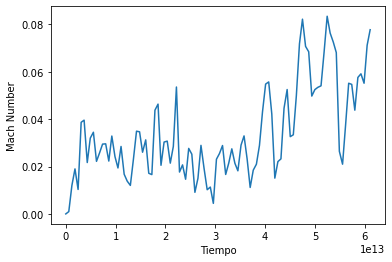

In [98]:
# From yesterday's lecture:

import pandas as pd

av_data = pd.read_csv('averages.txt', sep='\s+')


#lines = av_data.plot.line(x='Time', y='Mean_V')
#plt.show()


I=0.0
t=0.0
for i in range (0,99,1):
    
    vn=(av_data["Mean_V"][i+1])**2
    vo=(av_data["Mean_V"][i])**2
    dt=av_data["Time"][i+1]-av_data["Time"][i]
    I=I+vn*vo*dt*0.5
    t=t+dt
I=(I/t)**0.5

print("La velocidad cuadrática media Vrms es ", I,"km/s")
print("El número de Mach es ",I/10.0, "con lo cual es subsónico el gas")
    
    
mturb=av_data["Mean_V"]/10

plt.plot(av_data["Time"],mturb)
plt.xlabel("Tiempo")
plt.ylabel("Mach Number")

plt.show()



    

In [130]:
times, dens, number_dens, velx, vely, bx, by = read_my_vtk('data.0070.vtk'.format(i))


 - Calculate the gas pressure using the isothermal equation of state ($p=\rho\,c_{\rm iso}^2$), and make and print a 2D map of the pressure for file #70.

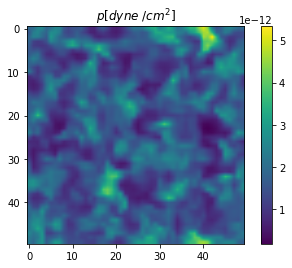

In [114]:
p=dens*(10*10**5)**2.0

plt.imshow(p.T,interpolation='bilinear',cmap="viridis")
plt.colorbar()

plt.title(r'$p[dyne\ /cm^{2}$]')


plt.show()


- Now that you have the pressure, you can calculate the so-called plasma beta of the gas, which is a dimensionless parameter that relates thermal, $p$, and magnetic pressure $\left(\frac{B^2}{8\,\pi}\right)$. Compute the plasma beta and make and print a 2D map for file #70.
  
 $$\beta = \frac{8\,\pi\,p}{B^2}$$


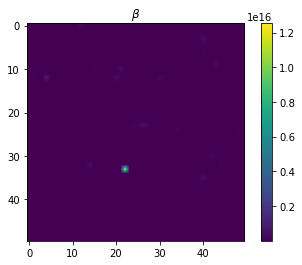

In [142]:
pb=8*np.pi*p/(bx**2+by**2)
plt.imshow(pb.T,interpolation='bilinear',cmap="viridis")
plt.colorbar()

plt.title(r'$ \beta$')


plt.show()